Vraag A. 1.

In [1]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
file_path = "/Users/martijn/Documents/belangrijk/Studie/Complex_networks/SFHH2025.xlsx"
df = pd.read_excel(file_path, sheet_name="Sheet1")

# Create an undirected graph from the dataset
G = nx.Graph()

# Add edges, ignoring time steps
edges = df[['id1', 'id2']].drop_duplicates().values.tolist()
G.add_edges_from(edges)

# 1. Number of nodes (N)
N = len(G.nodes())

# 2. Number of links (L)
L = len(G.edges())

# 3. Compute degree of each node
degrees = np.array([d for _, d in G.degree()])

# 4. Compute the average degree E[D]
E_D = np.mean(degrees)

# 5. Compute the standard deviation of the degree sqrt(Var[D])
std_D = np.std(degrees)

# Print results
print("Number of nodes (N):", N)
print("Number of links (L):", L)
print("Average degree (E[D]):", E_D)
print("Standard deviation of the degree (sqrt(Var[D])):", std_D)


Number of nodes (N): 401
Number of links (L): 9415
Average degree (E[D]): 46.957605985037404
Standard deviation of the degree (sqrt(Var[D])): 29.918521078014955


A. 2.

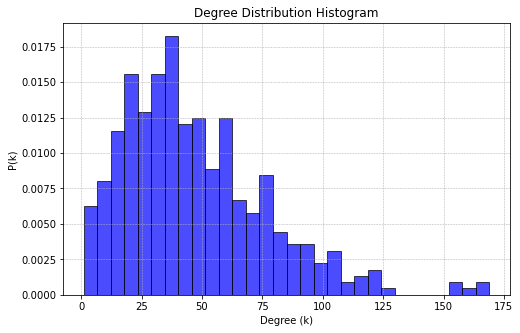

In [2]:
# Compute degree of each node
degrees = np.array([d for _, d in G.degree()])

# Plot histogram
plt.figure(figsize=(8, 5))
plt.hist(degrees, bins=30, color="blue", alpha=0.7, edgecolor="black", density=True)

# Set y-axis to log scale
# plt.yscale("log")

# Labels and title
plt.xlabel("Degree (k)")
plt.ylabel("P(k)")
plt.title("Degree Distribution Histogram")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()


Lijkt op ER random model. later nog verder uitwerken

Vraag A. 3.

In [4]:
assortativity = nx.degree_assortativity_coefficient(G)
print("Degree assortativity coefficient (ρD):", assortativity)


Degree assortativity coefficient (ρD): -0.08190596963063947


ρ D <0 (Disassortative Mixing): High-degree nodes tend to connect to low-degree nodes. This is often seen in technological and biological networks (e.g., power grids, metabolic networks).If your dataset represents a contact network, a positive assortativity (ρD>0ρ D​	 >0) suggests that individuals with many contacts tend to interact with other well-connected individuals. A negative assortativity (ρD<0ρ D<0) suggests that well-connected individuals interact more frequently with those who have fewer connections, which is often seen in epidemic spread models.



Vraag A.4.

In [5]:
clustering_local = nx.clustering(G)  # Returns a dictionary {node: c_i}
C_avg = nx.average_clustering(G)
print("Average clustering coefficient (C):", C_avg)



Average clustering coefficient (C): 0.2812358620467742


Vraag A.5.

In [6]:
E_H = nx.average_shortest_path_length(G)
print("Average hopcount (E[H]):", E_H)
H_max = nx.diameter(G)
print("Network diameter (Hmax):", H_max)


Average hopcount (E[H]): 1.9547007481296759
Network diameter (Hmax): 4


Physical Meaning
Small E[H]E[H] → The network is well-connected; on average, nodes are close to each other.Large E[H]E[H] → Nodes are far apart, meaning communication or spreading processes take more steps.Small Hmax⁡H max​	  → The network is compact; the worst-case path is short.Large Hmax⁡H max​	  → The network has long chains or poorly connected parts.


Misschien nog ff specifiseren wat small en wat large is.

Vraag A.6.

In [8]:
E_H = nx.average_shortest_path_length(G)
print("Average shortest path length (E[H]):", E_H)
C = nx.average_clustering(G)
print("Clustering coefficient (C):", C)
N = G.number_of_nodes()
L = G.number_of_edges()
C_random = L / (N * (N - 1) / 2)
print("Expected clustering coefficient for random network (C_random):", C_random)


Average shortest path length (E[H]): 1.9547007481296759
Clustering coefficient (C): 0.2812358620467742
Expected clustering coefficient for random network (C_random): 0.11739401496259351
